### Authors’ Note:

This is the 1st of 3 notebooks prepared on [2020 Winter School on Synchronization](https://complex-systems-turkey.github.io/). 

If you have any questions or comments please contact us at [GitHub repository](https://github.com/complex-systems-turkey/winter-2020-synchronization).

* [Oğuz Kaan Yüksel](https://github.com/okyksl)
* [Enis Simsar](https://github.com/enisimsar)
* [Galip Ümit Yolcu](https://github.com/gumityolcu)
* [Suzan Üsküdarlı](https://github.com/uskudarli)

# Introduction to Dynamical Systems

Dynamical systems are rules that determine how a particular state moves to another state in time. To understand quantative behaviour of these systems over time, first we need to define numerical integration and approximation methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
def integrate(estimator, f, x, t=0, dt=0.01, n=100):
    """Numerical approximation of a trajectory in a vector field

    Parameters
    ----------
    estimator : function
        A function that estimates the change of value in trajectory from a given point.
    f         : function
        A function that returns a vector field (or a gradient) on a given point.
    x         : array_like
        Initial value point of the trajectory.
    t         : float | tuple | array_like
        Initial time point | start and end time values | whole time points of the integration.
    dt        : float
        Time step will be used in the integration.
        Will only be used if `t` is not given as array_like.
    n         : int
        Number of steps will be used in the integration.
        Will only be used together with `dt` when `t` denotes the initial time value.

    Returns
    -------
    xs        : array_like
        a list of value points calculated with integration that start from given `x`.
    ts        : array
        a list of time points that corresponds to given value points.
    """

    # calculate time points that will be used in the integration
    if isinstance(t, float): # if given as (start) time point
        ts = np.arange(t, t + dt * n, dt) # start integrating from t using `dt` and `n`
    elif isinstance(t, tuple): # if given (start, end) time points
        ts = np.arange(t[0], t[1]+dt, dt) # utilize dt to find intermediate points 
    else: # if given as an array of time points
        ts = t

    xs = [ x ]
    for i in range(1, len(ts)):
        dt = ts[i] - ts[i-1] # calculate time diff
        x = x + estimator(f, x, ts[i], dt) # calculate next point
        xs.append(x)
    return np.stack(xs), ts

### [Euler Method](https://en.wikipedia.org/wiki/Euler_method) (Tangent Line Method)

The tangent line approximation of $y$ at $t$ can be written as:
\begin{align}
y(t_1) \approx y(t_0) + f(y(t_0), t_0)(t_1-t_0)
\end{align}

where $f(y) = \frac{dy}{dt}$. When the distance $\|t_1-t_0\|$ is very small, this is a good approximation. 

To define a discrete approximation method, we can fix a very small time interval $d$ and iteratively approximate the values of $y$ around some neighborhood of $t_0$.

\begin{align}
y_0 &= y(t_0) \\
y_i &= y_{i-1} + f(y_{i-1}) \cdot d
\end{align}

where $y_i \approx y(t_0 + i \cdot d)$.

In [3]:
def euler(f, x, t=0, dt=0.01):
    """Estimates a change in trajectory using Euler's Method.

    Parameters
    ----------
    f         : function
        A function that returns a vector field (or a gradient) on a given point.
    x         : array_like
        Value point of the estimation.
    t         : float | tuple | array
        Time point of the estimation. 
    dt        : float
        Time step will be used in estimation.

    Returns
    -------
    dx        : array_like
        Change estimated by Euler's Method.
    """
    
    return f(x, t) * dt

### [Heun's Method](https://en.wikipedia.org/wiki/Heun%27s_method) (Runge-Kutta $2^{nd}$ order Method)

Heun method is improved version of Euler's, a predictor-corrector method. The method uses dynamics to predict the slope at next step, then corrects Euler's method by averaging two consecutive tangent lines.

\begin{align}
y(t+h) \approx y(t) + \frac{f(y(t), t)+ f(\tilde{y}(t,h), t+h)}{2} \cdot h
\end{align}

where $\tilde{y}(t,h) = y(t) + f(y(t), t) \cdot h$. This method is a $2^{nd}$ order accurate method which means local error is on the order of $\mathcal{0}(h^3)$.

\begin{align}
y_0 &= y(t_0) \\
t_{i+1} &= t_0 + i \cdot d \\
y_{i+1} &= y_i + \frac{f(y_i, t_i)+ f(\tilde{y}_{i+1}, t_{i+1})}{2} \cdot d
\end{align}

where $\tilde{y}_{i+1}$ is calculated with Euler's Method. 

In [4]:
def heun(f, x, t=0, dt=0.01):
    """Estimates a change in trajectory using Heun's Method.

    Parameters
    ----------
    f         : function
        A function that returns a vector field (or a gradient) on a given point.
    x         : array_like
        Value point of the estimation.
    t         : float | tuple | array
        Time point of the estimation. 
    dt        : float
        Time step will be used in estimation.

    Returns
    -------
    dx        : array_like
        Change estimated by Heun's Method.
    """
    
    d_euler = euler(f, x, t, dt) # calculate change with Euler's
    x_euler = x + d_euler # calculate point estimated with Euler's
    return (d_euler + f(x_euler, t + dt) * dt) * 0.5 # apply Heun's correction

### [Runge-Kutta $4^{th}$ order Method](https://en.wikipedia.org/wiki/Runge–Kutta_methods)
RK4 method, the most famous member of the Runge-Kutta family, is a $4^{th}$ order accurate method which means local error is on the order of $\mathcal{0}(h^5)$. Here is the numerical integration procedure defined recursively on time points $t_i$s and associated value points $y_{i}s$.

\begin{align}
h &= t_i-t_{i-1}\\
y_{i} &= y_{i-1} + \frac{1}{6}(k_1+2k_2+2k_3+k_4)\\
k_1 &= h f(t_{i-1},y_{t_{i-1}})\\
k_2 &= h f(t_{i-1}+\frac{h}{2}, y_{i-1}+\frac{k_1}{2})\\
k_3 &= h f(t_{i-1}+\frac{h}{2}, y_{i-1}+\frac{k_2}{2})\\
k_4 &= h f(t_{i-1}+\frac{h}{2}, y_{i-1}+k_3)\\
\end{align}

In [5]:
def rk4(f, x, t, dt):
    """Estimates a change in trajectory using Runge-Kutta 4th order Method.

    Parameters
    ----------
    f         : function
        A function that returns a vector field (or a gradient) on a given point.
    x         : array_like
        Value point of the estimation.
    t         : float | tuple | array
        Time point of the estimation. 
    dt        : float
        Time step will be used in estimation.

    Returns
    -------
    dx        : array_like
        Change estimated by RK4 Method.
    """
    
    k1 = f(x, t) * dt
    k2 = f(x + k1 * 0.5, t + dt * 0.5) * dt
    k3 = f(x + k2 * 0.5, t + dt * 0.5) * dt
    k4 = f(x + k3, t + dt * 0.5) * dt
    return (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

### 1-d Differential Equation
We define a $1^{st}$ order differential equation with the general form $\dot{y}=f(y,t)$ where $\dot{y}$ is the derivative of the function $y(t)$ with respect to time $t$.<br>
For a simple example, let us choose the equation $\dot{y}=2y$
with the initial condition that $y(0)=1$. 

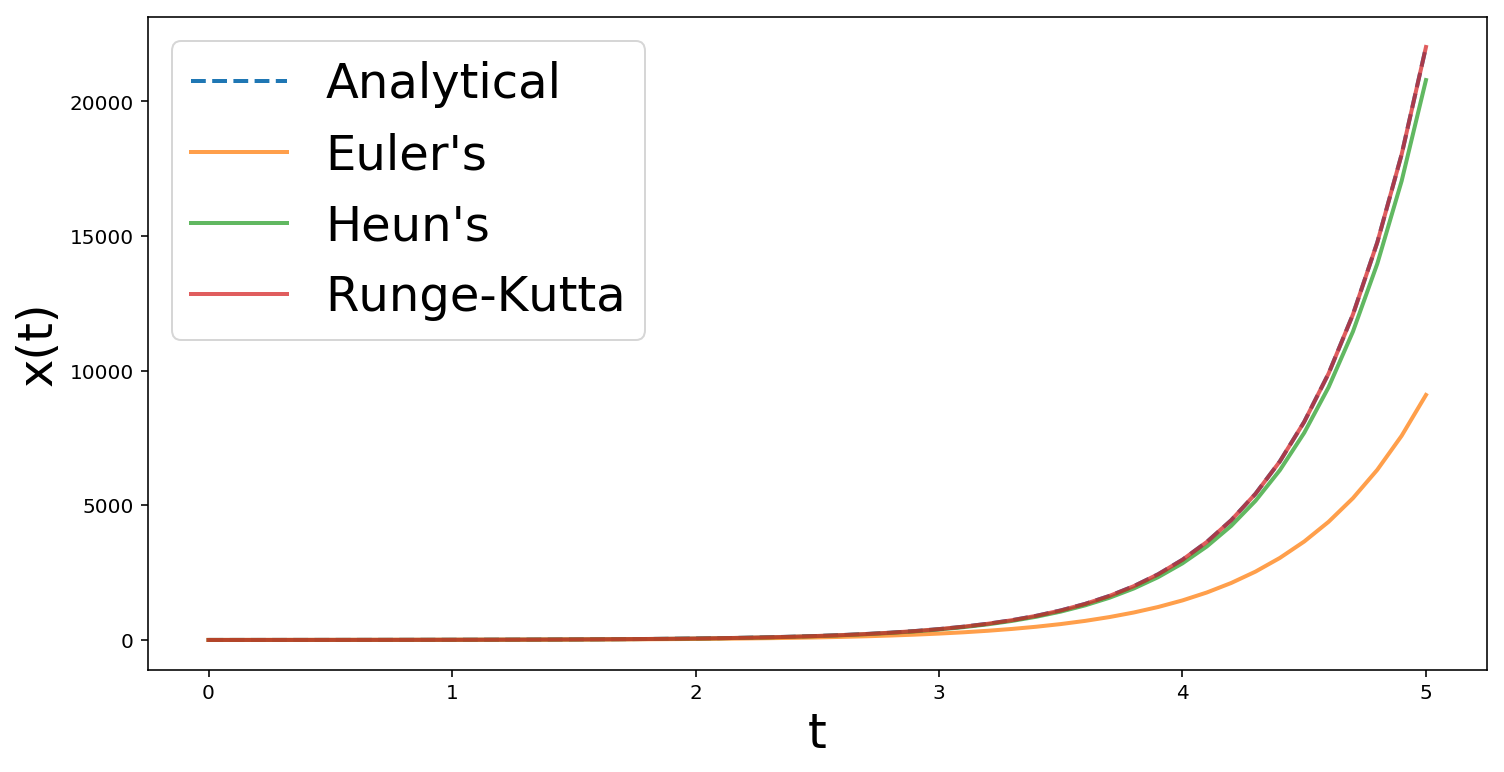

In [6]:
# define the derivative function
def f(x, t):
    return 2 * x

# define initial conditions and parameters of the integration
x0 = 1
t = (0,5)
dt = 0.1

# calculate trajectory of the initial point with numerical integration
x_euler, ts = integrate(euler, f=f, x=x0, t=t, dt=dt)
x_heun, _ = integrate(heun, f=f, x=x0, t=ts, dt=dt)
x_rk4, _ = integrate(rk4, f=f, x=x0, t=ts, dt=dt)

# calculate analytical solution of the problem
x_crt = np.exp(2 * ts)

# plot trajectories together
plt.figure(figsize=(12,6))
plt.plot(ts, x_crt, linewidth=2, linestyle='--')
plt.plot(ts, x_euler, linewidth=2, alpha=0.75)
plt.plot(ts, x_heun, linewidth=2, alpha=0.75)
plt.plot(ts, x_rk4, linewidth=2, alpha=0.75)
plt.ylabel('x(t)', fontsize=24)
plt.xlabel('t', fontsize=24)
plt.legend(['Analytical', 'Euler\'s', 'Heun\'s', 'Runge-Kutta'], fontsize=24);

### 2-d Differential Equation
Now, we are going to take a look at an application of $2^{nd}$ order differential equation, in particular mass-spring problem.
\begin{align}
m \frac{d^{2}y}{dt^2} &= -k y
\end{align}
Assume for simplicity $\frac{k}{m} = 1$ where $k$ is the spring constant and $m$ is the mass. Our problem turns into: 
\begin{align}
\frac{d^{2}y}{dt^2} &= -y
\end{align}

Assume the initial condition is $y(0)=1$ and $\dot{y}(0)=0$

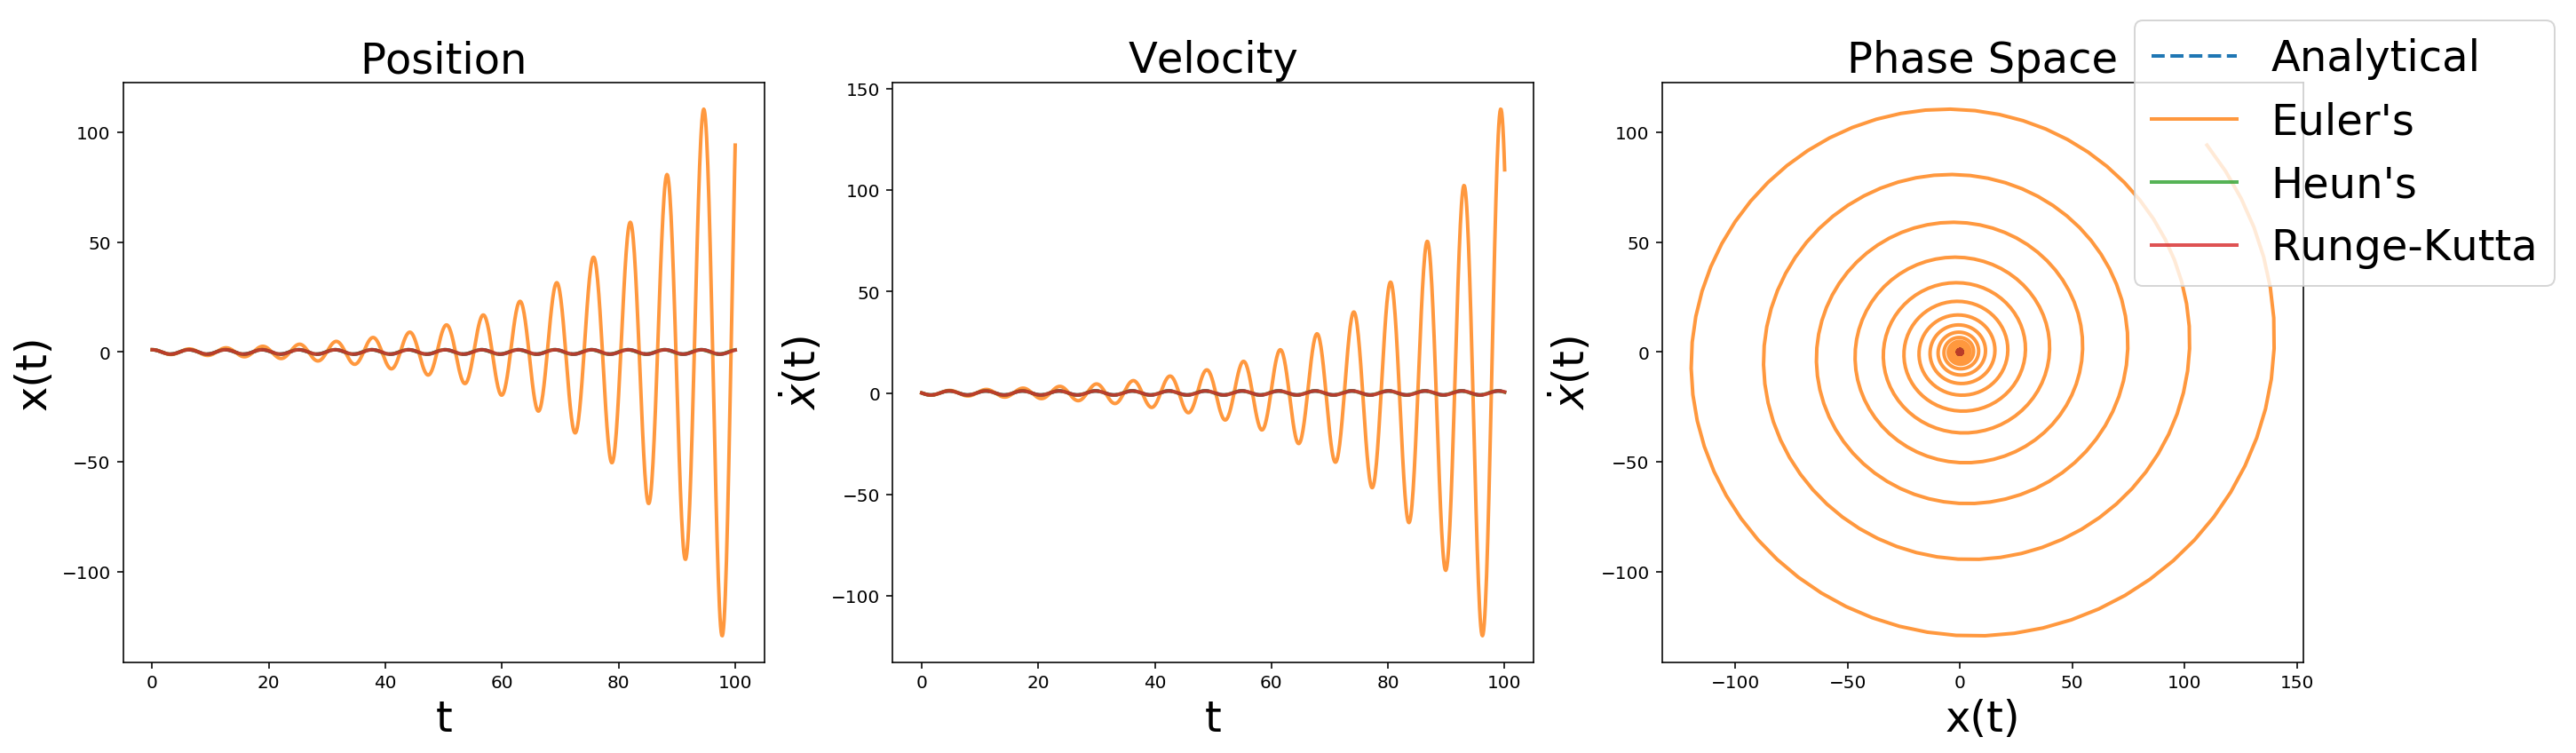

In [7]:
# define the derivative function
def f(x, t):
    return np.asarray([ x[1], -x[0] ])

# define initial conditions and parameters of the integration
x0 = np.asarray([ 1, 0 ])
t = (0,100)
dt = 0.1

# calculate trajectory of the initial point with numerical integration
x_euler, ts = integrate(euler, f=f, x=x0, t=t, dt=dt)
x_heun, _ = integrate(heun, f=f, x=x0, t=t, dt=dt)
x_rk4, _ = integrate(rk4, f=f, x=x0, t=t, dt=dt)

# calculate analytical solution of the problem
x_crt = np.transpose(np.asarray([np.cos(ts), -np.sin(ts)]))

# plot trajectories together
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(22,6))
axs[0].plot(ts, x_crt[:, 0], linewidth=2, linestyle='--')
axs[0].plot(ts, x_euler[:, 0], linewidth=2, alpha=0.8)
axs[0].plot(ts, x_heun[:, 0], linewidth=2, alpha=0.8)
axs[0].plot(ts, x_rk4[:, 0], linewidth=2, alpha=0.8)
axs[0].set_ylabel('x(t)', fontsize=24)
axs[0].set_xlabel('t', fontsize=24)
axs[0].set_title('Position', fontsize=24)

axs[1].plot(ts, x_crt[:, 1], linewidth=2, linestyle='--')
axs[1].plot(ts, x_euler[:, 1], linewidth=2, alpha=0.8)
axs[1].plot(ts, x_heun[:, 1], linewidth=2, alpha=0.8)
axs[1].plot(ts, x_rk4[:, 1], linewidth=2, alpha=0.8)
axs[1].set_ylabel('$\dot{x}$(t)', fontsize=24)
axs[1].set_xlabel('t', fontsize=24)
axs[1].set_title('Velocity', fontsize=24)

axs[2].plot(x_crt[:, 1], x_crt[:, 0], linewidth=2, linestyle='--')
axs[2].plot(x_euler[:, 1], x_euler[:, 0], linewidth=2, alpha=0.8)
axs[2].plot(x_heun[:, 1], x_heun[:, 0], linewidth=2, alpha=0.8)
axs[2].plot(x_rk4[:, 1], x_rk4[:, 0], linewidth=2, alpha=0.8)
axs[2].set_ylabel('$\dot{x}$(t)', fontsize=24)
axs[2].set_xlabel('x(t)', fontsize=24)
axs[2].set_title('Phase Space', fontsize=24)

fig.legend(['Analytical', 'Euler\'s', 'Heun\'s', 'Runge-Kutta'], fontsize=24);

# Synchronization of Linear Systems

### Synchronization of two linearly coupled linear systems

Analytical investigation predicts that these two systems synchronize at:

\begin{align}
\alpha_c = \frac{a}{2} 
\end{align}

So, as long as

\begin{align}
\alpha_c \geq \frac{a}{2} 
\end{align}

synchronization should occur. Let our systems be by defined by the equations:

\begin{aligned}
\dot{y_1} &= ay_1 + \alpha (y_2 - y_1)\\
\dot{y_2} &= ay_2 + \alpha (y_1 - y_2)
\end{aligned}



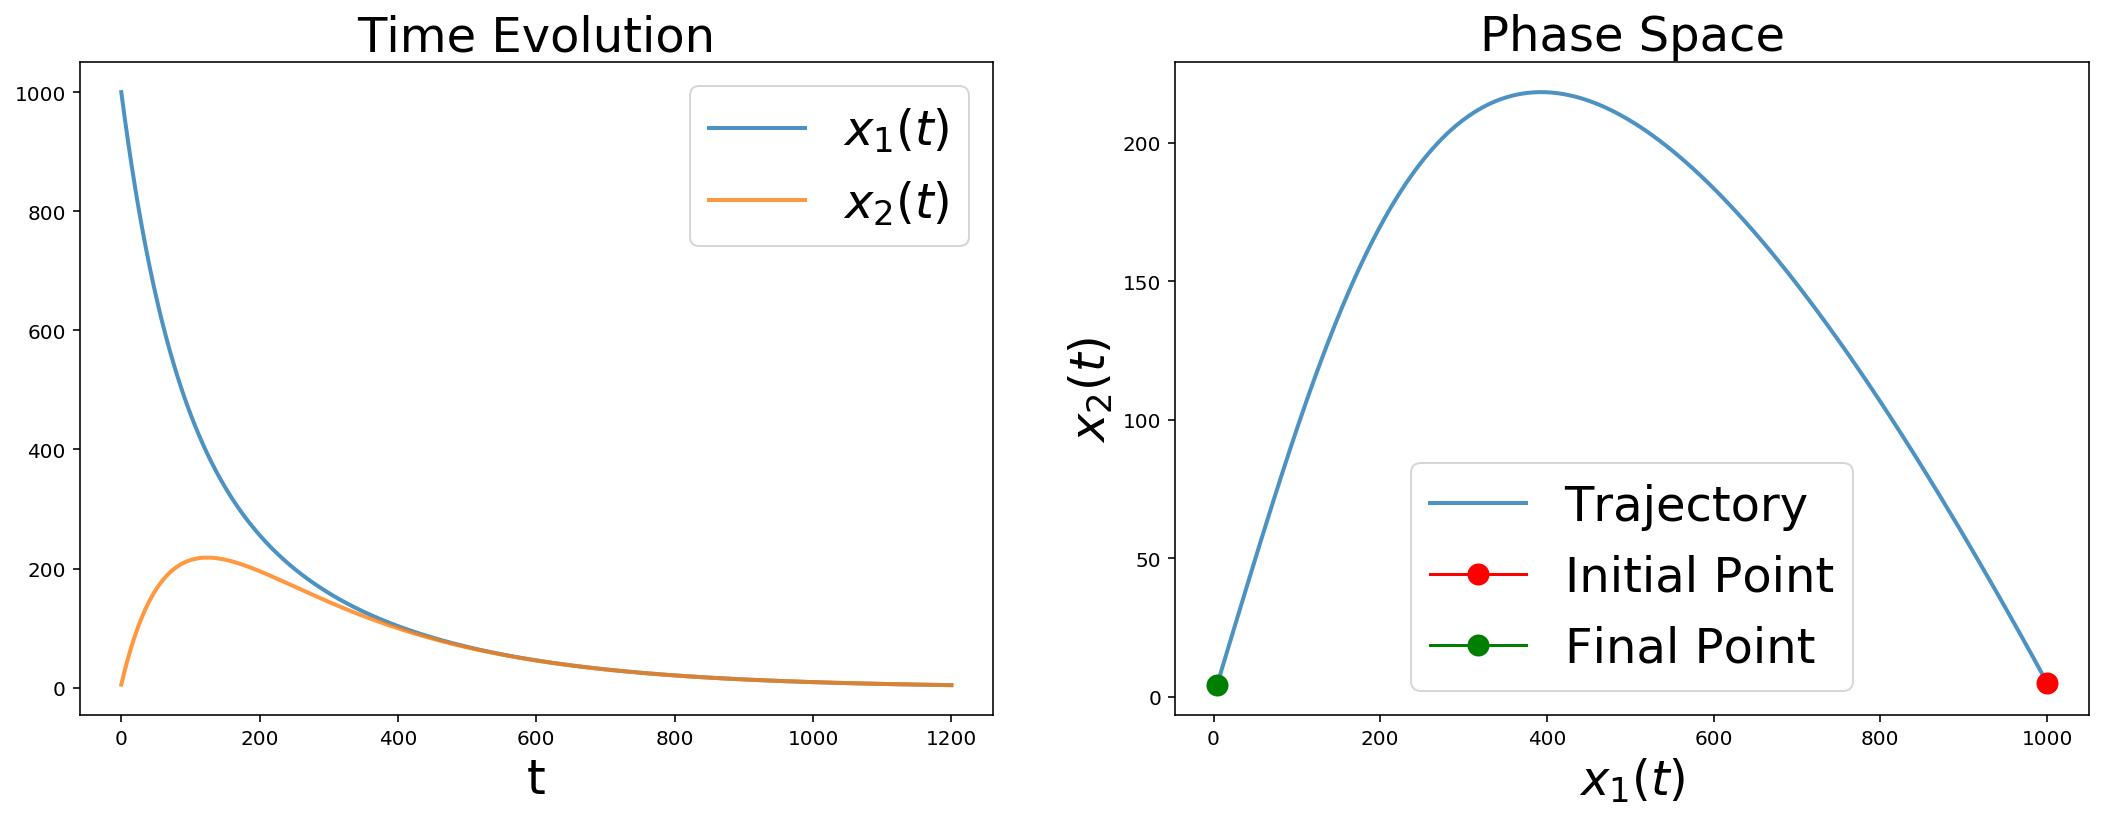

In [8]:
"""
1. TODO: The task given here is this "Tune the alpha parameter to see the synchronization case".
An interactive plot that you can play with a and alpha would be great here.
"""

# define a function for two coupled linear system
def f(x, t, a=-0.4, alpha=0.5):
    return np.asarray([
        a * x[0] + alpha * (x[1] - x[0]),
        a * x[1] + alpha * (x[0] - x[1])
    ])

# define initial conditions and parameters of the integration
x0 = np.asarray([1000, 5])
t = (0, 12)
dt = 0.01

# calculate trajectory of the initial point with numerical integration
x_rk4, _ = integrate(rk4, f=f, x=x0, t=t, dt=dt)

# plot trajectories of both systems
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(x_rk4[:, 0], linewidth=2, alpha=0.8)
axs[0].plot(x_rk4[:, 1], linewidth=2, alpha=0.8)
axs[0].set_xlabel('t', fontsize=24)
axs[0].set_title('Time Evolution', fontsize=24)
axs[0].legend(['$x_1(t)$', '$x_2(t)$'], fontsize=24)

axs[1].plot(x_rk4[:, 0], x_rk4[:, 1], linewidth=2, alpha=0.8)
axs[1].set_xlabel('$x_1(t)$', fontsize=24)
axs[1].set_ylabel('$x_2(t)$', fontsize=24)
axs[1].plot(x0[0], x0[1], marker='o', markersize=10, color='r')
axs[1].plot(x_rk4[-1, 0], x_rk4[-1, 1], marker='o', markersize=10, color='g')
axs[1].set_title('Phase Space', fontsize=24)
axs[1].legend(['Trajectory', 'Initial Point', 'Final Point'], fontsize=24);

The synchronization error can be defined by:
\begin{align}
E = \frac{1}{N(N-1)}\sum_{i,j\gt 1} |x_i - x_j|
\end{align}
But as $\|x_i - x_j\| = \|x_j - x_i\| $, this sum could be written as:

\begin{align}
E = \frac{2}{N(N-1)}\sum_{i = 1}^{N} \sum_{j=1}^{i} |x_i - x_j|
\end{align}


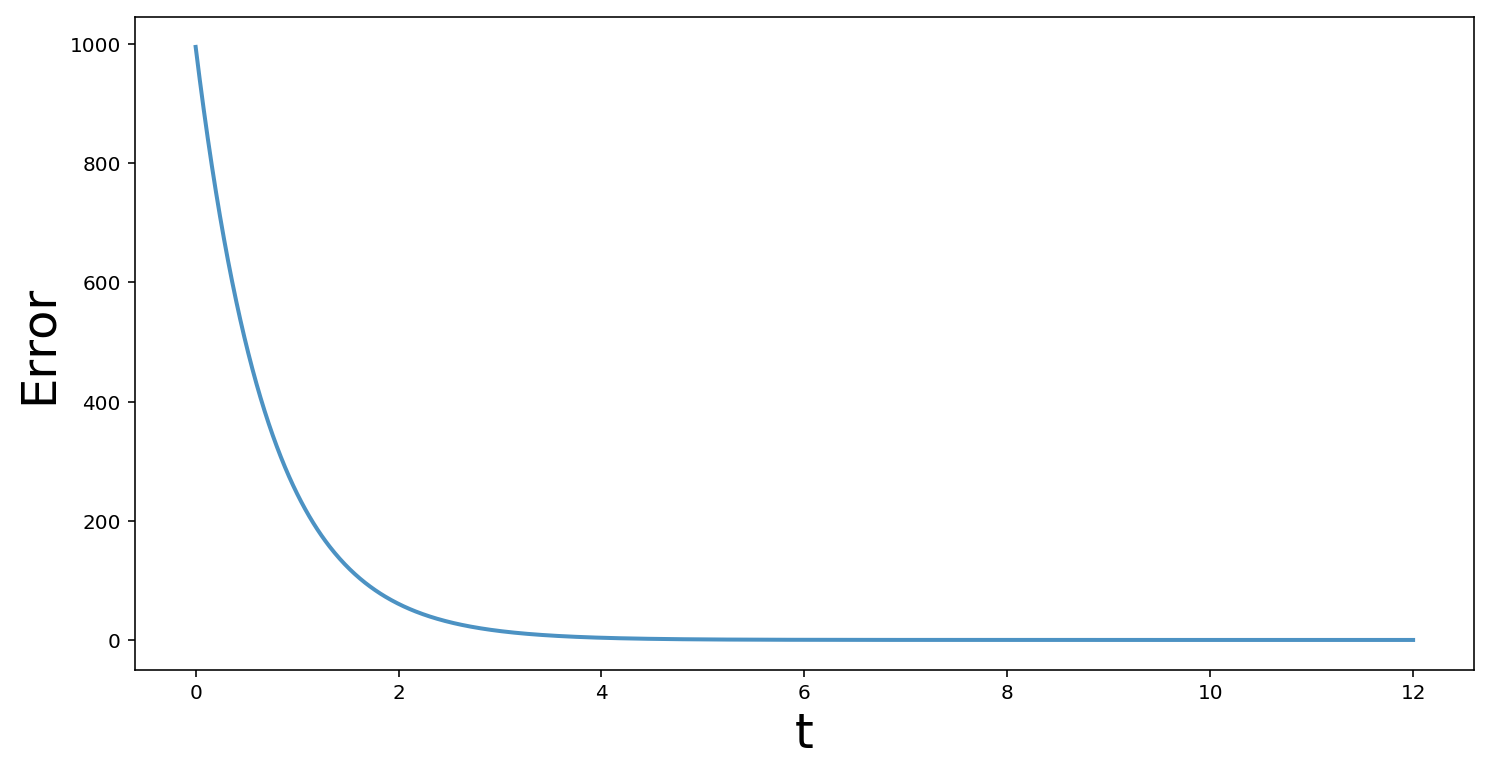

In [9]:
# define a function for synchronization error
def error(x):
    n = x.shape[1] # assume x is shape (t x n)
    x_row = np.repeat(x[..., np.newaxis], n, axis=2) # construct t times (n x n) matrices with same values in rows
    x_col = np.transpose(x_row, (0, 2, 1)) # construct t times (n x n) matrices with same values in cols
    x_err = np.abs(x_col - x_row) # calculate error between all (i, j) pairs over matrices
    x_err = np.sum(x_err, axis=(1,2)) # sum errors in matrices and collapse to (t)
    x_err = x_err / (n * (n-1)) # only have n * (n-1) in denominator bcs matrices count every (i,j) twice
    return x_err

# calculate trajectory of the initial point with numerical integration and error
x_rk4, ts = integrate(rk4, f=f, x=x0, t=t, dt=dt)
err = error(x_rk4)

# plot synchronization error
plt.figure(figsize=(12,6))
plt.plot(ts, err, linewidth=2, alpha=0.8)
plt.ylabel('Error', fontsize=24)
plt.xlabel('t', fontsize=24);

### Synchronization of N linearly coupled linear systems

Analytical investigation predicts that these N systems synchronize at:

\begin{align}
\alpha_c = \frac{a}{N} 
\end{align}

where $N$ is the number of variables. So, as long as

\begin{align}
\alpha_c \geq \frac{a}{N} 
\end{align}

systems are expected to synchronize.

Things to note: 

* As $\alpha$ is increased synchronization happens much fast. Is that expected?
* At $\alpha = \frac{a}{N}$ systems are neutrally stable?
* What happens as N tends to infinity?

\begin{align}
\dot{y_i} = ay_i + \alpha \sum_{j=1}^{N} (y_j - y_i)
\end{align}

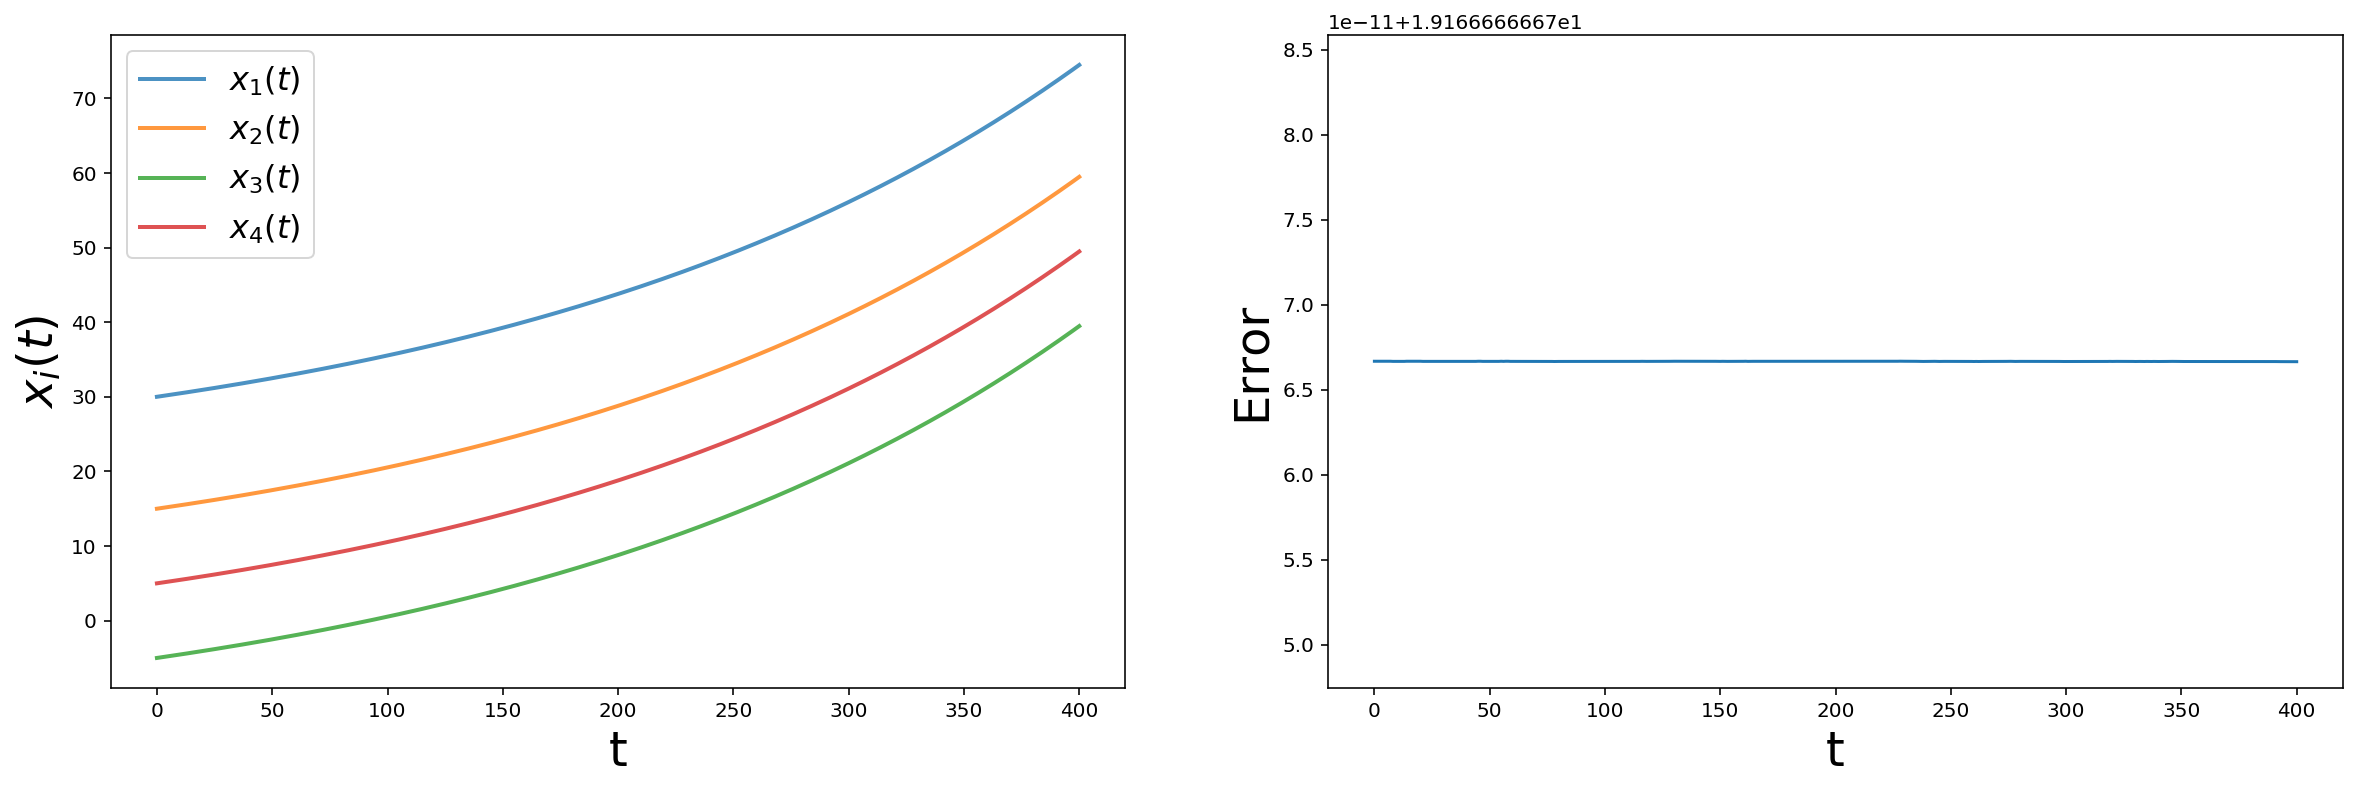

In [10]:
"""
1. TODO: The task given here is this "Tune the alpha parameter around its critical value and see the behaviour".
An interactive plot that you can play with a and alpha would be great here.
"""

# define a function for N linearly coupled linear systems
def f(x, t, a=0.4, alpha=0.1):
    n = x.shape[0]
    x_row = np.repeat(x[..., np.newaxis], n, axis=1) # duplicate over rows
    x_col = np.transpose(x_row) # duplicate over cols
    dx_coup = alpha * (x_col - x_row) # calculate coupling matrix
    dx_diag = a * np.diag(x) # calculate internal dynamics (or diagonal of laplacian)
    return np.sum(dx_diag + dx_coup, axis=1) # sum over columns to get derivatives for each system

# define initial conditions and parameters of the integration
x0 = np.asarray([30, 15, -5, 5])
t = (0, 4)
dt = 0.01

# calculate trajectory of the initial point with numerical integration and error
x_rk4, _ = integrate(rk4, f=f, x=x0, t=t, dt=dt)
err = error(x_rk4)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
axs[0].plot(x_rk4, linewidth=2, alpha=0.8)
axs[0].set_ylabel('$x_i(t)$', fontsize=24)
axs[0].set_xlabel('t', fontsize=24)
axs[0].legend([('$x_%d(t)$' % i) for i in range(1, x_rk4.shape[1]+1)], fontsize=16)

axs[1].plot(err)
axs[1].set_ylabel('Error', fontsize=24)
axs[1].set_xlabel('t', fontsize=24);